In [1]:
# 한국인 데이터 전처리
import pandas as pd
korean_data=pd.read_csv('../data/korean_data.csv')
korean_data

,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),식사요법 이유,평소 식사량과 비교,고강도 신체활동 여부,중강도 신체활동 여부
0,1.0,75.0,159.8,58.9,23.065440,624.642550,8.0,3.0,2.0,2.0
1,2.0,70.0,151.2,41.8,18.284063,922.289958,8.0,2.0,2.0,2.0
2,2.0,42.0,156.7,53.5,21.787921,3521.884974,2.0,2.0,2.0,2.0
3,2.0,9.0,142.0,35.8,17.754414,3476.032477,8.0,1.0,8.0,8.0
4,1.0,43.0,185.0,79.8,23.316289,2624.110312,8.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
6924,1.0,80.0,162.4,63.3,24.001128,1346.633466,8.0,2.0,2.0,2.0
6925,2.0,78.0,157.3,71.7,28.977553,1838.070072,8.0,2.0,2.0,1.0
6926,2.0,61.0,145.1,40.2,19.093750,1686.294918,8.0,2.0,2.0,1.0
6927,1.0,57.0,172.8,74.4,24.916409,1629.256388,2.0,2.0,2.0,1.0


In [2]:
# 결측치 확인하기 
# 성별 1:남자, 2:여자
# 식사요법이유 1:질환,2:체중을조절하기위해서 3:기타 8:비해당 9모름
# 고강도 신체활동여부 1:예, 2:아니오 8:비해당 9:모름
# 중강도 신체활동여부 1:예, 2:아니오 8:비해당 9:모름
korean_data[korean_data.isna().any(axis=1)]

,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),식사요법 이유,평소 식사량과 비교,고강도 신체활동 여부,중강도 신체활동 여부
7,1.0,53.0,NaN,NaN,NaN,2405.776439,8.0,1.0,9.0,9.0
57,1.0,59.0,164.8,75.0,27.615115,NaN,NaN,NaN,2.0,2.0
64,2.0,52.0,NaN,90.8,NaN,1479.626568,8.0,3.0,2.0,2.0
98,2.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0
135,1.0,16.0,NaN,NaN,NaN,2457.228521,2.0,1.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...
6753,1.0,62.0,164.5,69.8,25.794292,NaN,NaN,NaN,2.0,1.0
6812,1.0,60.0,163.2,67.4,25.305772,NaN,NaN,NaN,9.0,9.0
6835,2.0,62.0,149.6,52.1,23.279548,NaN,NaN,NaN,9.0,9.0
6891,1.0,30.0,179.7,62.4,19.323618,NaN,NaN,NaN,9.0,9.0


In [3]:
# 결측치 제거
korean_data.dropna(inplace=True)

In [4]:
# 고강도 신체활동여부 1:예, 2:아니오 8:비해당 9:모름
# 중강도 신체활동여부 1:예, 2:아니오 8:비해당 9:모름
korean_data=korean_data[(korean_data['고강도 신체활동 여부']!=8.0)]

In [5]:
# 초기값 설정
korean_data['활동량계수'] = '1.2'

# 조건에 따라 값 업데이트
korean_data.loc[
    (korean_data['고강도 신체활동 여부'] == 2.0) & (korean_data['중강도 신체활동 여부'] == 1.0),
    '활동량계수'
] = '1.375'

korean_data.loc[
    (korean_data['고강도 신체활동 여부'] == 1.0) & (korean_data['중강도 신체활동 여부'] == 2.0),
    '활동량계수'
] = '1.725'

korean_data.loc[
    (korean_data['고강도 신체활동 여부'] == 1.0) & (korean_data['중강도 신체활동 여부'] == 1.0),
    '활동량계수'
] = '1.9'
korean_data.loc[
    (korean_data['고강도 신체활동 여부'] == 9.0) & (korean_data['중강도 신체활동 여부'] == 9.0),
    '활동량계수'
] = '1.55'


C:\Users\4545\AppData\Local\Temp\ipykernel_5492\99210621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korean_data['활동량계수'] = '1.2'


In [6]:
#korean_data.drop('고강도 신체활동 여부',axis=1,inplace=True)
#korean_data.drop('중강도 신체활동 여부',axis=1,inplace=True)
korean_data.drop('식사요법 이유',axis=1,inplace=True)
korean_data.drop('평소 식사량과 비교',axis=1,inplace=True)
korean_data

C:\Users\4545\AppData\Local\Temp\ipykernel_5492\2981709062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korean_data.drop('식사요법 이유',axis=1,inplace=True)
C:\Users\4545\AppData\Local\Temp\ipykernel_5492\2981709062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korean_data.drop('평소 식사량과 비교',axis=1,inplace=True)


,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),고강도 신체활동 여부,중강도 신체활동 여부,활동량계수
0,1.0,75.0,159.8,58.9,23.065440,624.642550,2.0,2.0,1.2
1,2.0,70.0,151.2,41.8,18.284063,922.289958,2.0,2.0,1.2
2,2.0,42.0,156.7,53.5,21.787921,3521.884974,2.0,2.0,1.2
4,1.0,43.0,185.0,79.8,23.316289,2624.110312,2.0,2.0,1.2
8,1.0,42.0,172.5,67.7,22.751523,2243.391641,2.0,2.0,1.2
...,...,...,...,...,...,...,...,...,...
6924,1.0,80.0,162.4,63.3,24.001128,1346.633466,2.0,2.0,1.2
6925,2.0,78.0,157.3,71.7,28.977553,1838.070072,2.0,1.0,1.375
6926,2.0,61.0,145.1,40.2,19.093750,1686.294918,2.0,1.0,1.375
6927,1.0,57.0,172.8,74.4,24.916409,1629.256388,2.0,1.0,1.375


In [7]:
korean_data['활동량계수'] = pd.to_numeric(korean_data['활동량계수'], errors='coerce')

# 초기 일일권장섭취량 열 추가
korean_data['일일권장섭취량'] = 0

# 성별이 1(남성)인 경우
korean_data.loc[korean_data['성별'] == 1.0, '일일권장섭취량'] = ((
    10 * korean_data['체중'] +
    6.25 * korean_data['신장'] -
    5 * korean_data['나이'] +
    5
)* korean_data['활동량계수'])

# 성별이 2(여성)인 경우
korean_data.loc[korean_data['성별'] == 2.0, '일일권장섭취량'] = ((
    10 * korean_data['체중'] +
    6.25 * korean_data['신장'] -
    5 * korean_data['나이'] -
    161
)*korean_data['활동량계수'])
korean_data

C:\Users\4545\AppData\Local\Temp\ipykernel_5492\4172414306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korean_data['활동량계수'] = pd.to_numeric(korean_data['활동량계수'], errors='coerce')
C:\Users\4545\AppData\Local\Temp\ipykernel_5492\4172414306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korean_data['일일권장섭취량'] = 0


,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),고강도 신체활동 여부,중강도 신체활동 여부,활동량계수,일일권장섭취량
0,1.0,75.0,159.8,58.9,23.065440,624.642550,2.0,2.0,1.200,1461.300000
1,2.0,70.0,151.2,41.8,18.284063,922.289958,2.0,2.0,1.200,1022.400000
2,2.0,42.0,156.7,53.5,21.787921,3521.884974,2.0,2.0,1.200,1372.050000
4,1.0,43.0,185.0,79.8,23.316289,2624.110312,2.0,2.0,1.200,2093.100000
8,1.0,42.0,172.5,67.7,22.751523,2243.391641,2.0,2.0,1.200,1860.150000
...,...,...,...,...,...,...,...,...,...,...
6924,1.0,80.0,162.4,63.3,24.001128,1346.633466,2.0,2.0,1.200,1503.600000
6925,2.0,78.0,157.3,71.7,28.977553,1838.070072,2.0,1.0,1.375,1580.046875
6926,2.0,61.0,145.1,40.2,19.093750,1686.294918,2.0,1.0,1.375,1158.953125
6927,1.0,57.0,172.8,74.4,24.916409,1629.256388,2.0,1.0,1.375,2123.000000


In [8]:
# 평소 식사량과 비교 (
korean_data[korean_data['에너지 섭취량(Kcal)']>=korean_data['일일권장섭취량']]

,성별,나이,신장,체중,체질량지수,에너지 섭취량(Kcal),고강도 신체활동 여부,중강도 신체활동 여부,활동량계수,일일권장섭취량
2,2.0,42.0,156.7,53.5,21.787921,3521.884974,2.0,2.0,1.200,1372.050000
4,1.0,43.0,185.0,79.8,23.316289,2624.110312,2.0,2.0,1.200,2093.100000
8,1.0,42.0,172.5,67.7,22.751523,2243.391641,2.0,2.0,1.200,1860.150000
9,2.0,43.0,156.9,49.7,20.188800,1924.311916,2.0,2.0,1.200,1321.950000
15,1.0,50.0,165.4,72.9,26.647503,4336.591553,2.0,2.0,1.200,1821.300000
...,...,...,...,...,...,...,...,...,...,...
6915,2.0,72.0,153.2,60.2,25.649503,1294.454663,2.0,2.0,1.200,1246.200000
6916,1.0,48.0,172.0,81.3,27.481071,3157.521515,2.0,2.0,1.200,1983.600000
6925,2.0,78.0,157.3,71.7,28.977553,1838.070072,2.0,1.0,1.375,1580.046875
6926,2.0,61.0,145.1,40.2,19.093750,1686.294918,2.0,1.0,1.375,1158.953125


In [9]:
# 학습할 데이터
pd.set_option('display.max_rows', 100)
weight_change=pd.read_csv('../data/weight_change_dataset.csv')
weight_change

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.200000,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.400000,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.400000,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.800000,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.000000,10,Lightly Active,Good,1,157.5
5,6,56,F,152.9,2100.6,2262.4,161.9,-12.513498,9,Sedentary,Poor,6,140.4
6,7,36,M,107.3,1991.3,2933.4,942.1,-2.437307,2,Moderately Active,Poor,5,104.9
7,8,40,M,207.9,2977.9,4000.0,1022.1,-35.678115,11,Moderately Active,Poor,9,172.2
8,9,28,F,169.5,2406.9,3890.2,1483.4,-8.476633,10,Very Active,Poor,1,161.0
9,10,28,F,169.2,2403.3,2485.8,82.5,0.000000,2,Sedentary,Excellent,7,169.2


In [10]:
weight_change.drop(['Participant ID','Sleep Quality','Stress Level','Final Weight (lbs)'],axis=1,inplace=True)

In [11]:
weight_change=weight_change.rename(columns={'Age':'나이','Gender':'성별','Current Weight (lbs)':'체중','BMR (Calories)':'BMR','Daily Calories Consumed':'에너지 섭취량(Kcal)','Daily Caloric Surplus/Deficit':'일일 칼로리 잉여/적자','Weight Change (lbs)':'체중변화','Physical Activity Level':'활동량계수','Duration (weeks)':'기간'})

In [12]:
# 조건에 따라 값 업데이트
weight_change.loc[weight_change['활동량계수'] == 'Sedentary', '활동량계수'] = '1.2'
weight_change.loc[weight_change['활동량계수'] == 'Lightly Active', '활동량계수'] = '1.375'
weight_change.loc[weight_change['활동량계수'] == 'Very Active', '활동량계수'] = '1.725'
weight_change.loc[weight_change['활동량계수'] == 'Moderately Active', '활동량계수'] = '1.55'
weight_change.loc[weight_change['성별'] == 'M', '성별']='1.0'
weight_change.loc[weight_change['성별'] == 'F', '성별']='2.0'

In [13]:
# 신장 초기화 (0으로 설정)
weight_change['신장'] = 0

# 남성: 성별이 M인 경우
weight_change.loc[weight_change['성별'] == '1.0', '신장'] = (
    ((weight_change['BMR']) -
     (10 * weight_change['체중']) +
     (5 * weight_change['나이']) -
     5) / 6.25
)

# 여성: 성별이 F인 경우
weight_change.loc[weight_change['성별'] == '2.0', '신장'] = (
    ((weight_change['BMR']) -
     (10 * weight_change['체중']) +
     (5 * weight_change['나이']) +
     161) / 6.25
)
weight_change

,나이,성별,체중,BMR,에너지 섭취량(Kcal),일일 칼로리 잉여/적자,체중변화,기간,활동량계수,신장
0,56,1.0,228.4,3102.3,3916.0,813.7,0.200000,1,1.2,174.928
1,46,2.0,165.4,2275.5,3823.0,1547.5,2.400000,6,1.725,162.000
2,32,2.0,142.8,2119.4,2785.4,666.0,1.400000,7,1.2,161.984
3,25,2.0,145.5,2181.3,2587.3,406.0,0.800000,8,1.2,161.968
4,38,1.0,155.5,2463.8,3312.8,849.0,2.000000,10,1.375,175.008
5,56,2.0,152.9,2100.6,2262.4,161.9,-12.513498,9,1.2,162.016
6,36,1.0,107.3,1991.3,2933.4,942.1,-2.437307,2,1.55,174.928
7,40,1.0,207.9,2977.9,4000.0,1022.1,-35.678115,11,1.55,175.024
8,28,2.0,169.5,2406.9,3890.2,1483.4,-8.476633,10,1.725,162.064
9,28,2.0,169.2,2403.3,2485.8,82.5,0.000000,2,1.2,161.968


In [14]:
weight_change['체중']=weight_change['체중']*0.453592

In [15]:
weight_change['체중변화']=weight_change['체중변화']*0.453592

In [16]:
weight_change['성별']=pd.to_numeric(weight_change['성별'])

In [17]:
korean_data.drop(['고강도 신체활동 여부','중강도 신체활동 여부','체질량지수'],axis=1,inplace=True)

C:\Users\4545\AppData\Local\Temp\ipykernel_5492\3731839865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korean_data.drop(['고강도 신체활동 여부','중강도 신체활동 여부','체질량지수'],axis=1,inplace=True)


In [18]:
display(weight_change.describe())
display(korean_data.describe())

,나이,성별,체중,BMR,에너지 섭취량(Kcal),일일 칼로리 잉여/적자,체중변화,기간,신장
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,37.910000,1.43000,77.805997,2518.206000,3518.292000,1000.091000,-1.260903,6.920000,169.408960
std,12.219454,0.49757,13.759195,364.431221,513.313097,371.560827,3.376411,3.515277,6.464084
min,18.000000,1.00000,45.359200,1566.500000,2030.900000,82.500000,-16.183308,1.000000,161.920000
25%,26.750000,1.00000,69.694411,2255.050000,3233.300000,766.950000,-2.273544,4.000000,162.016000
50%,38.000000,1.00000,78.085863,2519.500000,3636.050000,1013.100000,0.045359,7.000000,174.928000
75%,46.250000,2.00000,87.305120,2805.975000,4000.000000,1253.325000,0.839145,10.000000,175.008000
max,59.000000,2.00000,108.045614,3390.800000,4000.000000,1922.500000,2.267960,12.000000,175.072000


,성별,나이,신장,체중,에너지 섭취량(Kcal),활동량계수,일일권장섭취량
count,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000,5685.000000
mean,1.563940,53.697625,163.322164,64.375726,1789.220738,1.338769,1761.730140
std,0.495938,16.552984,9.189966,12.999189,792.965910,0.215125,512.198583
min,1.000000,19.000000,135.900000,30.600000,170.247380,1.200000,770.850000
25%,1.000000,41.000000,156.400000,54.800000,1254.316980,1.200000,1395.600000
50%,2.000000,55.000000,162.800000,62.700000,1654.206472,1.200000,1652.550000
75%,2.000000,67.000000,170.100000,71.900000,2162.070510,1.375000,2002.515625
max,2.000000,80.000000,193.000000,141.800000,9187.821545,1.900000,4209.925000


In [19]:
weight_change.to_csv('../data/weight_predict.csv',index=False)

In [20]:
# 체중 변화 예측해볼 데이터
korean_data['일일 칼로리 잉여/적자'] = korean_data['에너지 섭취량(Kcal)']-korean_data['일일권장섭취량']


C:\Users\4545\AppData\Local\Temp\ipykernel_5492\1176370320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korean_data['일일 칼로리 잉여/적자'] = korean_data['에너지 섭취량(Kcal)']-korean_data['일일권장섭취량']


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
import tensorflow as tf
import matplotlib.pyplot as plt

In [22]:
dataset=pd.read_csv('../data/weight_predict.csv',delimiter=',',encoding='utf8')
new_order=['나이','성별','신장','체중','활동량계수','BMR','에너지 섭취량(Kcal)','일일 칼로리 잉여/적자','체중변화','기간']
dataset=dataset[new_order]
dataset

,나이,성별,신장,체중,활동량계수,BMR,에너지 섭취량(Kcal),일일 칼로리 잉여/적자,체중변화,기간
0,56,1.0,174.928,103.600413,1.200,3102.3,3916.0,813.7,0.090718,1
1,46,2.0,162.000,75.024117,1.725,2275.5,3823.0,1547.5,1.088621,6
2,32,2.0,161.984,64.772938,1.200,2119.4,2785.4,666.0,0.635029,7
3,25,2.0,161.968,65.997636,1.200,2181.3,2587.3,406.0,0.362874,8
4,38,1.0,175.008,70.533556,1.375,2463.8,3312.8,849.0,0.907184,10
5,56,2.0,162.016,69.354217,1.200,2100.6,2262.4,161.9,-5.676023,9
6,36,1.0,174.928,48.670422,1.550,1991.3,2933.4,942.1,-1.105543,2
7,40,1.0,175.024,94.301777,1.550,2977.9,4000.0,1022.1,-16.183308,11
8,28,2.0,162.064,76.883844,1.725,2406.9,3890.2,1483.4,-3.844933,10
9,28,2.0,161.968,76.747766,1.200,2403.3,2485.8,82.5,0.000000,2


In [23]:
# BMR 계산 함수
def calculate_bmr(dataset):
    if dataset["성별"] == 1.0:  # 남성
        return 10 * dataset["체중"] + 6.25 * dataset["신장"] - 5 * dataset["나이"] + 5
    elif dataset["성별"] == 2.0:  # 여성
        return 10 * dataset["체중"] + 6.25 * dataset["신장"] - 5 * dataset["나이"] - 161

# BMR 열 추가
dataset["BMR"] = dataset.apply(calculate_bmr, axis=1)

dataset['에너지 섭취량(Kcal)'] =dataset['에너지 섭취량(Kcal)']*0.453592*dataset['활동량계수']
dataset['일일 칼로리 잉여/적자'] =dataset['에너지 섭취량(Kcal)']-dataset["BMR"]*dataset['활동량계수']
dataset

,나이,성별,신장,체중,활동량계수,BMR,에너지 섭취량(Kcal),일일 칼로리 잉여/적자,체중변화,기간
0,56,1.0,174.928,103.600413,1.200,1854.304128,2131.519526,-93.645427,0.090718,1
1,46,2.0,162.000,75.024117,1.725,1371.741168,2991.291823,625.038308,1.088621,6
2,32,2.0,161.984,64.772938,1.200,1339.129376,1516.122188,-90.833063,0.635029,7
3,25,2.0,161.968,65.997636,1.200,1386.276360,1408.294298,-255.237334,0.362874,8
4,38,1.0,175.008,70.533556,1.375,1614.135560,2066.156919,-153.279476,0.907184,10
5,56,2.0,162.016,69.354217,1.200,1265.142168,1231.447849,-286.722753,-5.676023,9
6,36,1.0,174.928,48.670422,1.550,1405.004216,2062.378498,-115.378037,-1.105543,2
7,40,1.0,175.024,94.301777,1.550,1841.917768,2812.270400,-42.702140,-16.183308,11
8,28,2.0,162.064,76.883844,1.725,1480.738440,3043.872207,489.598398,-3.844933,10
9,28,2.0,161.968,76.747766,1.200,1478.777664,1353.046792,-421.486404,0.000000,2


In [44]:
# 종속변수 : 체중변화 # 독립변수: 나머지변수
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X= dataset[['나이','성별','신장','체중','활동량계수','BMR','에너지 섭취량(Kcal)','일일 칼로리 잉여/적자']]
X_scaled = scaler_X.fit_transform(X)
y= dataset[['체중변화','기간']]
y_scaled = scaler_y.fit_transform(y)

In [25]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2,)

X_train.shape, y_train.shape,X_test.shape,y_test.shape

((80, 8), (80, 2), (20, 8), (20, 2))

In [26]:
# 모델 구성
model = Sequential()
model.add(Dense(128, activation='LeakyReLU', input_dim =8))  # 입력층

model.add(Dense(64, activation='LeakyReLU'))  # 은닉층
model.add(Dense(32, activation='LeakyReLU'))  # 은닉층

model.add(Dense(2,activation='linear'))  # 출력층

# 모델 요약 출력
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 11,554
Trainable params: 11,554
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 4. 모델 학습과정 설정(손실함수, 옵티마이저, 평가지표)
model.compile(loss='mse',optimizer="adam",metrics=['mae'])
loss, mae = model.evaluate(X_test, y_test)
print(f"테스트 세트 - 손실(MSE): {loss:.4f}, 평균 절대 오차(MAE): {mae:.4f}")

1/1 [==============================] - 1s 832ms/step - loss: 0.7648 - mae: 0.7453
테스트 세트 - 손실(MSE): 0.7648, 평균 절대 오차(MAE): 0.7453


In [28]:
# 5. 학습시키기
hist = model.fit(X_train, y_train,
                    validation_split=0.25,
                    epochs=200, batch_size=32)

Epoch 1/200
2/2 [==============================] - 1s 81ms/step - loss: 1.2509 - mae: 0.8610 - val_loss: 0.9403 - val_mae: 0.7812
Epoch 2/200
2/2 [==============================] - 0s 40ms/step - loss: 1.1297 - mae: 0.8164 - val_loss: 1.0360 - val_mae: 0.8243
Epoch 3/200
2/2 [==============================] - 0s 43ms/step - loss: 1.0725 - mae: 0.7987 - val_loss: 1.1537 - val_mae: 0.8690
Epoch 4/200
2/2 [==============================] - 0s 56ms/step - loss: 1.0346 - mae: 0.7888 - val_loss: 1.2772 - val_mae: 0.9219
Epoch 5/200
2/2 [==============================] - 0s 44ms/step - loss: 1.0018 - mae: 0.7794 - val_loss: 1.3808 - val_mae: 0.9602
Epoch 6/200
2/2 [==============================] - 0s 41ms/step - loss: 0.9787 - mae: 0.7686 - val_loss: 1.4669 - val_mae: 0.9878
Epoch 7/200
2/2 [==============================] - 0s 43ms/step - loss: 0.9657 - mae: 0.7606 - val_loss: 1.5339 - val_mae: 1.0077
Epoch 8/200
2/2 [==============================] - 0s 36ms/step - loss: 0.9543 - mae: 0.75

2/2 [==============================] - 0s 38ms/step - loss: 0.5127 - mae: 0.5250 - val_loss: 1.7348 - val_mae: 1.0180
Epoch 64/200
2/2 [==============================] - 0s 41ms/step - loss: 0.5059 - mae: 0.5212 - val_loss: 1.7488 - val_mae: 1.0232
Epoch 65/200
2/2 [==============================] - 0s 37ms/step - loss: 0.5005 - mae: 0.5211 - val_loss: 1.7456 - val_mae: 1.0225
Epoch 66/200
2/2 [==============================] - 0s 38ms/step - loss: 0.4977 - mae: 0.5201 - val_loss: 1.7532 - val_mae: 1.0242
Epoch 67/200
2/2 [==============================] - 0s 40ms/step - loss: 0.4904 - mae: 0.5136 - val_loss: 1.7916 - val_mae: 1.0394
Epoch 68/200
2/2 [==============================] - 0s 39ms/step - loss: 0.4849 - mae: 0.5139 - val_loss: 1.7904 - val_mae: 1.0391
Epoch 69/200
2/2 [==============================] - 0s 38ms/step - loss: 0.4778 - mae: 0.5089 - val_loss: 1.7673 - val_mae: 1.0306
Epoch 70/200
2/2 [==============================] - 0s 38ms/step - loss: 0.4730 - mae: 0.5075 - 

2/2 [==============================] - 0s 37ms/step - loss: 0.2510 - mae: 0.3523 - val_loss: 2.0058 - val_mae: 1.0933
Epoch 126/200
2/2 [==============================] - 0s 36ms/step - loss: 0.2471 - mae: 0.3475 - val_loss: 1.9674 - val_mae: 1.0852
Epoch 127/200
2/2 [==============================] - 0s 36ms/step - loss: 0.2459 - mae: 0.3514 - val_loss: 1.9461 - val_mae: 1.0744
Epoch 128/200
2/2 [==============================] - 0s 35ms/step - loss: 0.2353 - mae: 0.3425 - val_loss: 2.0005 - val_mae: 1.0905
Epoch 129/200
2/2 [==============================] - 0s 36ms/step - loss: 0.2337 - mae: 0.3416 - val_loss: 2.0180 - val_mae: 1.0937
Epoch 130/200
2/2 [==============================] - 0s 38ms/step - loss: 0.2442 - mae: 0.3443 - val_loss: 2.0475 - val_mae: 1.1057
Epoch 131/200
2/2 [==============================] - 0s 39ms/step - loss: 0.2368 - mae: 0.3419 - val_loss: 1.8969 - val_mae: 1.0611
Epoch 132/200
2/2 [==============================] - 0s 38ms/step - loss: 0.2328 - mae: 0.

2/2 [==============================] - 0s 38ms/step - loss: 0.1207 - mae: 0.2478 - val_loss: 2.2073 - val_mae: 1.1650
Epoch 188/200
2/2 [==============================] - 0s 37ms/step - loss: 0.1128 - mae: 0.2240 - val_loss: 2.3350 - val_mae: 1.1940
Epoch 189/200
2/2 [==============================] - 0s 37ms/step - loss: 0.1149 - mae: 0.2261 - val_loss: 2.2313 - val_mae: 1.1674
Epoch 190/200
2/2 [==============================] - 0s 36ms/step - loss: 0.1124 - mae: 0.2246 - val_loss: 2.1944 - val_mae: 1.1604
Epoch 191/200
2/2 [==============================] - 0s 40ms/step - loss: 0.1108 - mae: 0.2217 - val_loss: 2.2460 - val_mae: 1.1800
Epoch 192/200
2/2 [==============================] - 0s 39ms/step - loss: 0.1114 - mae: 0.2287 - val_loss: 2.2975 - val_mae: 1.1949
Epoch 193/200
2/2 [==============================] - 0s 54ms/step - loss: 0.1075 - mae: 0.2204 - val_loss: 2.2690 - val_mae: 1.1774
Epoch 194/200
2/2 [==============================] - 0s 39ms/step - loss: 0.1089 - mae: 0.

In [29]:
hist.history

{'loss': [1.250924825668335,
  1.1297177076339722,
  1.072515606880188,
  1.0346217155456543,
  1.0018048286437988,
  0.978654146194458,
  0.9657322764396667,
  0.9543207287788391,
  0.9389153718948364,
  0.92643141746521,
  0.9119278192520142,
  0.9000078439712524,
  0.8851448893547058,
  0.8769954442977905,
  0.8668866753578186,
  0.8537145256996155,
  0.8439093232154846,
  0.8370386958122253,
  0.8276599049568176,
  0.8177075982093811,
  0.8070053458213806,
  0.7995294332504272,
  0.787609338760376,
  0.7791207432746887,
  0.7691389322280884,
  0.7618923783302307,
  0.7555333375930786,
  0.7467986941337585,
  0.7375620603561401,
  0.7304624915122986,
  0.7206681370735168,
  0.71405029296875,
  0.7110974788665771,
  0.6997515559196472,
  0.693827211856842,
  0.6840255856513977,
  0.6766348481178284,
  0.671319305896759,
  0.6614442467689514,
  0.6538671255111694,
  0.647400438785553,
  0.6413019895553589,
  0.6336537599563599,
  0.6287130117416382,
  0.6221668124198914,
  0.612341821

In [30]:
y_pred = model.predict(X_test)
for y,h in zip(y_test,y_pred):
    print(f'실제값:{y},예측값:{h[0]:.2f},{h[1]:.2f}')

1/1 [==============================] - 0s 93ms/step
실제값:[-0.38877556 -0.83484474],예측값:0.83,1.04
실제값:[ 0.42933327 -0.83484474],예측값:1.35,-2.22
실제값:[-0.3780377   0.59468392],예측값:0.24,-0.52
실제값:[ 0.64536245 -0.548939  ],예측값:1.19,1.38
실제값:[ 0.69936975 -0.26303327],예측값:0.07,0.96
실제값:[-1.01037651  0.59468392],예측값:0.00,0.94
실제값:[-0.2666616  -1.12075047],예측값:0.51,1.33
실제값:[0.56435151 0.02287246],예측값:0.12,-0.60
실제값:[0.65886427 0.02287246],예측값:0.07,-0.87
실제값:[ 0.41583144 -1.69256193],예측값:-3.74,1.56
실제값:[1.02341352 1.45240112],예측값:0.27,0.37
실제값:[0.64536245 0.88058965],예측값:0.05,-1.28
실제값:[ 0.64536245 -0.548939  ],예측값:0.62,-1.12
실제값:[ 0.18706216 -1.69256193],예측값:-0.30,0.33
실제값:[0.51034421 0.88058965],예측값:0.45,0.93
실제값:[0.96940623 1.16649538],예측값:0.64,-0.90
실제값:[-0.30070799  0.59468392],예측값:0.49,0.46
실제값:[0.86139163 1.45240112],예측값:0.95,-0.27
실제값:[-0.3967753   0.88058965],예측값:2.36,0.27
실제값:[0.69936975 0.30877819],예측값:0.17,-0.62


In [32]:
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test)
for y,h in zip(y_test_original,y_pred_original):
    print(f'실제값:{y[0]:.2f},{y[1]:.2f},예측값:{h[0]:.2f},{h[1]:.2f}')

실제값:-2.57,4.00,예측값:1.53,10.57
실제값:0.18,4.00,예측값:3.27,-0.83
실제값:-2.53,9.00,예측값:-0.44,5.10
실제값:0.91,5.00,예측값:2.73,11.74
실제값:1.09,6.00,예측값:-1.04,10.27
실제값:-4.66,9.00,예측값:-1.25,10.21
실제값:-2.16,3.00,예측값:0.44,11.58
실제값:0.64,7.00,예측값:-0.84,4.82
실제값:0.95,7.00,예측값:-1.04,3.88
실제값:0.14,1.00,예측값:-13.83,12.37
실제값:2.18,12.00,예측값:-0.36,8.23
실제값:0.91,10.00,예측값:-1.10,2.45
실제값:0.91,5.00,예측값:0.82,3.00
실제값:-0.63,1.00,예측값:-2.28,8.06
실제값:0.45,10.00,예측값:0.25,10.17
실제값:2.00,11.00,예측값:0.90,3.79
실제값:-2.27,9.00,예측값:0.38,8.53
실제값:1.63,12.00,예측값:1.94,5.99
실제값:-2.59,10.00,예측값:6.66,7.87
실제값:1.09,8.00,예측값:-0.68,4.74


In [33]:
korean_data=korean_data[['나이','성별','신장','체중','활동량계수','일일권장섭취량','에너지 섭취량(Kcal)','일일 칼로리 잉여/적자']]

In [34]:
korean_data.columns=['나이','성별','신장','체중','활동량계수','BMR','에너지 섭취량(Kcal)','일일 칼로리 잉여/적자']

In [35]:
korean_data.reset_index(drop=True)

,나이,성별,신장,체중,활동량계수,BMR,에너지 섭취량(Kcal),일일 칼로리 잉여/적자
0,75.0,1.0,159.8,58.9,1.200,1461.300000,624.642550,-836.657450
1,70.0,2.0,151.2,41.8,1.200,1022.400000,922.289958,-100.110042
2,42.0,2.0,156.7,53.5,1.200,1372.050000,3521.884974,2149.834974
3,43.0,1.0,185.0,79.8,1.200,2093.100000,2624.110312,531.010312
4,42.0,1.0,172.5,67.7,1.200,1860.150000,2243.391641,383.241641
...,...,...,...,...,...,...,...,...
5680,80.0,1.0,162.4,63.3,1.200,1503.600000,1346.633466,-156.966534
5681,78.0,2.0,157.3,71.7,1.375,1580.046875,1838.070072,258.023197
5682,61.0,2.0,145.1,40.2,1.375,1158.953125,1686.294918,527.341793
5683,57.0,1.0,172.8,74.4,1.375,2123.000000,1629.256388,-493.743612


In [45]:
y_pred_scaled= scaler_X.transform(korean_data)
korean_pred = model.predict(y_pred_scaled)
korean_pred

178/178 [==============================] - 0s 2ms/step


array([[-3.8897498 ,  1.7790968 ],
       [ 0.04073545, -0.6058647 ],
       [ 5.0344143 ,  4.421179  ],
       ...,
       [ 2.5816853 ,  0.60831517],
       [-1.5443963 , -1.8639573 ],
       [ 5.6229477 , -0.13605504]], dtype=float32)

In [50]:
korean_pred_original = scaler_y.inverse_transform(korean_pred)
for idx, i in enumerate(korean_pred_original):
    print(f"{idx + 1}번째: 몸무게변화예측 = {i[0]:.2f}, 기간= {i[1]:.2f}")

1번째: 몸무게변화예측 = -14.33, 기간= 13.14
2번째: 몸무게변화예측 = -1.12, 기간= 4.80
3번째: 몸무게변화예측 = 15.65, 기간= 22.38
4번째: 몸무게변화예측 = 14.33, 기간= 2.39
5번째: 몸무게변화예측 = 9.85, 기간= 4.43
6번째: 몸무게변화예측 = 7.66, 기간= 9.31
7번째: 몸무게변화예측 = -1.10, 기간= 4.58
8번째: 몸무게변화예측 = 22.41, 기간= 27.37
9번째: 몸무게변화예측 = -8.51, 기간= -0.49
10번째: 몸무게변화예측 = 3.34, 기간= 6.02
11번째: 몸무게변화예측 = 5.67, 기간= 4.67
12번째: 몸무게변화예측 = -0.34, 기간= 5.35
13번째: 몸무게변화예측 = -7.47, 기간= 10.83
14번째: 몸무게변화예측 = 9.11, 기간= 9.15
15번째: 몸무게변화예측 = -2.87, 기간= 4.59
16번째: 몸무게변화예측 = -1.41, 기간= 4.18
17번째: 몸무게변화예측 = -2.58, 기간= -7.92
18번째: 몸무게변화예측 = 17.93, 기간= 23.32
19번째: 몸무게변화예측 = 0.80, 기간= 3.02
20번째: 몸무게변화예측 = 3.29, 기간= 1.69
21번째: 몸무게변화예측 = 1.15, 기간= 2.24
22번째: 몸무게변화예측 = 4.85, 기간= 5.15
23번째: 몸무게변화예측 = 11.10, 기간= 16.57
24번째: 몸무게변화예측 = -2.00, 기간= 3.61
25번째: 몸무게변화예측 = 14.10, 기간= 16.55
26번째: 몸무게변화예측 = -0.95, 기간= 0.66
27번째: 몸무게변화예측 = -0.83, 기간= 3.36
28번째: 몸무게변화예측 = 4.36, 기간= 3.57
29번째: 몸무게변화예측 = 9.45, 기간= -7.41
30번째: 몸무게변화예측 = 2.92, 기간= 7.14
31번째: 몸무게변화예측 = 10.50, 기간= 13.12
32번째: 몸무게변화예측 = 7

C:\Users\4545\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


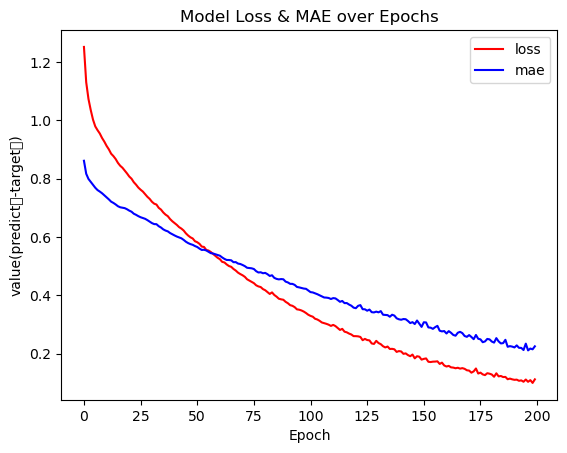

In [51]:
plt.plot(hist.history['loss'],'r',label='loss')
plt.plot(hist.history['mae'],'b',label='mae')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('value(predict값-target값)')
plt.title('Model Loss & MAE over Epochs')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# 데이터 준비
X = dataset[['나이', '성별', '신장', '체중', '활동량계수', 'BMR', '에너지 섭취량(Kcal)', '일일 칼로리 잉여/적자']]
y_continuous = dataset['체중변화']  # 연속형 출력 변수
y_categorical = dataset['기간']  # 범주형 출력 변수

# 스케일링과 원핫인코딩
scaler_X = StandardScaler()
scaler_y = StandardScaler()
encoder = OneHotEncoder(sparse=False)

X_scaled = scaler_X.fit_transform(X)
y_cont_scaled = scaler_y.fit_transform(y_continuous.values.reshape(-1, 1))
y_cat_encoded = encoder.fit_transform(y_categorical.values.reshape(-1, 1))

# 데이터 분할
X_train, X_test, y_cont_train, y_cont_test, y_cat_train, y_cat_test = train_test_split(
    X_scaled, y_cont_scaled, y_cat_encoded, test_size=0.2)

# 모델 구성
input_layer = Input(shape=(X_train.shape[1],))  # 독립 변수

# 은닉층
hidden = Dense(512)(input_layer)
hidden = LeakyReLU(alpha=0.1)(hidden)
hidden = Dense(64)(hidden)
hidden = LeakyReLU(alpha=0.1)(hidden)
hidden = Dense(32)(hidden)
hidden = LeakyReLU(alpha=0.1)(hidden)

# 출력층 1: 연속형 (체중변화)
output1 = Dense(1, activation='linear', name='weight_change')(hidden)

# 출력층 2: 범주형 (기간)
output2 = Dense(y_cat_encoded.shape[1], activation='softmax', name='duration')(hidden)

# 모델 정의
model = Model(inputs=input_layer, outputs=[output1, output2])

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss={'weight_change': 'mse', 'duration': 'categorical_crossentropy'},
    metrics={'weight_change': 'mae', 'duration': 'accuracy'}
)

# 모델 요약
model.summary()

# 모델 학습
history = model.fit(
    X_train,
    {'weight_change': y_cont_train, 'duration': y_cat_train},
    validation_split=0.2,
    epochs=200,
    batch_size=32)

# 테스트 세트 평가
loss, loss_cont, loss_cat, mae_cont, acc_cat = model.evaluate(
    X_test,
    {'weight_change': y_cont_test, 'duration': y_cat_test}
)
print(f"테스트 세트 - 체중변화 손실(MSE): {loss_cont:.4f}, MAE: {mae_cont:.4f}")
print(f"테스트 세트 - 기간 손실: {loss_cat:.4f}, 정확도: {acc_cat:.4f}")

# 예측
y_pred_cont, y_pred_cat = model.predict(X_test)

# 역 스케일링 및 결과 출력
y_pred_cont_original = scaler_y.inverse_transform(y_pred_cont)
y_cont_test_original = scaler_y.inverse_transform(y_cont_test)

# 예측 출력
for idx, (cont_true, cont_pred, cat_true, cat_pred) in enumerate(zip(
    y_cont_test_original, y_pred_cont_original, y_cat_test, y_pred_cat
)):
    true_duration = encoder.inverse_transform([cat_true])[0]
    pred_duration = encoder.inverse_transform([cat_pred])[0]
    print(f"{idx + 1}번째 - 체중변화 실제: {cont_true[0]:.2f}, 예측: {cont_pred[0]:.2f}, "
          f"기간 실제: {true_duration}, 예측: {pred_duration}")


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 512)          4608        ['input_4[0][0]']                
                                                                                                  
 leaky_re_lu_12 (LeakyReLU)     (None, 512)          0           ['dense_13[0][0]']               
                                                                                                  
 dense_14 (Dense)               (None, 64)           32832       ['leaky_re_lu_12[0][0]']         
                                                                                            

C:\Users\4545\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


2/2 [==============================] - 1s 334ms/step - loss: 3.1861 - weight_change_loss: 0.6869 - duration_loss: 2.4992 - weight_change_mae: 0.6274 - duration_accuracy: 0.0938 - val_loss: 4.1425 - val_weight_change_loss: 1.5903 - val_duration_loss: 2.5522 - val_weight_change_mae: 0.8701 - val_duration_accuracy: 0.1875
Epoch 2/200
2/2 [==============================] - 0s 54ms/step - loss: 3.0561 - weight_change_loss: 0.5940 - duration_loss: 2.4621 - weight_change_mae: 0.5495 - duration_accuracy: 0.0781 - val_loss: 4.2031 - val_weight_change_loss: 1.6384 - val_duration_loss: 2.5647 - val_weight_change_mae: 0.9047 - val_duration_accuracy: 0.0625
Epoch 3/200
2/2 [==============================] - 0s 63ms/step - loss: 3.0034 - weight_change_loss: 0.5690 - duration_loss: 2.4344 - weight_change_mae: 0.5416 - duration_accuracy: 0.0625 - val_loss: 4.2311 - val_weight_change_loss: 1.6540 - val_duration_loss: 2.5772 - val_weight_change_mae: 0.9154 - val_duration_accuracy: 0.0625
Epoch 4/200
2/2

Epoch 26/200
2/2 [==============================] - 0s 53ms/step - loss: 2.3279 - weight_change_loss: 0.3386 - duration_loss: 1.9893 - weight_change_mae: 0.4127 - duration_accuracy: 0.2812 - val_loss: 4.8099 - val_weight_change_loss: 1.8194 - val_duration_loss: 2.9906 - val_weight_change_mae: 0.9930 - val_duration_accuracy: 0.1250
Epoch 27/200
2/2 [==============================] - 0s 54ms/step - loss: 2.3078 - weight_change_loss: 0.3351 - duration_loss: 1.9726 - weight_change_mae: 0.4111 - duration_accuracy: 0.2656 - val_loss: 4.8472 - val_weight_change_loss: 1.8294 - val_duration_loss: 3.0178 - val_weight_change_mae: 0.9986 - val_duration_accuracy: 0.1250
Epoch 28/200
2/2 [==============================] - 0s 52ms/step - loss: 2.2823 - weight_change_loss: 0.3291 - duration_loss: 1.9532 - weight_change_mae: 0.4114 - duration_accuracy: 0.2812 - val_loss: 4.8980 - val_weight_change_loss: 1.8529 - val_duration_loss: 3.0451 - val_weight_change_mae: 1.0053 - val_duration_accuracy: 0.1250
E

Epoch 51/200
2/2 [==============================] - 0s 43ms/step - loss: 1.7011 - weight_change_loss: 0.1838 - duration_loss: 1.5173 - weight_change_mae: 0.3191 - duration_accuracy: 0.5000 - val_loss: 5.9756 - val_weight_change_loss: 2.2624 - val_duration_loss: 3.7133 - val_weight_change_mae: 1.1798 - val_duration_accuracy: 0.0625
Epoch 52/200
2/2 [==============================] - 0s 47ms/step - loss: 1.6762 - weight_change_loss: 0.1755 - duration_loss: 1.5007 - weight_change_mae: 0.3052 - duration_accuracy: 0.5000 - val_loss: 5.9938 - val_weight_change_loss: 2.2515 - val_duration_loss: 3.7424 - val_weight_change_mae: 1.1723 - val_duration_accuracy: 0.0625
Epoch 53/200
2/2 [==============================] - 0s 44ms/step - loss: 1.6466 - weight_change_loss: 0.1661 - duration_loss: 1.4806 - weight_change_mae: 0.2924 - duration_accuracy: 0.5000 - val_loss: 6.0257 - val_weight_change_loss: 2.2473 - val_duration_loss: 3.7784 - val_weight_change_mae: 1.1510 - val_duration_accuracy: 0.0625
E

2/2 [==============================] - 0s 43ms/step - loss: 1.1725 - weight_change_loss: 0.0857 - duration_loss: 1.0868 - weight_change_mae: 0.2101 - duration_accuracy: 0.6562 - val_loss: 7.3816 - val_weight_change_loss: 2.4795 - val_duration_loss: 4.9021 - val_weight_change_mae: 1.2311 - val_duration_accuracy: 0.0000e+00
Epoch 76/200
2/2 [==============================] - 0s 43ms/step - loss: 1.1517 - weight_change_loss: 0.0790 - duration_loss: 1.0726 - weight_change_mae: 0.2006 - duration_accuracy: 0.7031 - val_loss: 7.5383 - val_weight_change_loss: 2.5865 - val_duration_loss: 4.9518 - val_weight_change_mae: 1.2815 - val_duration_accuracy: 0.0000e+00
Epoch 77/200
2/2 [==============================] - 0s 47ms/step - loss: 1.1318 - weight_change_loss: 0.0754 - duration_loss: 1.0564 - weight_change_mae: 0.1925 - duration_accuracy: 0.6875 - val_loss: 7.5324 - val_weight_change_loss: 2.5179 - val_duration_loss: 5.0145 - val_weight_change_mae: 1.2514 - val_duration_accuracy: 0.0000e+00
Ep

2/2 [==============================] - 0s 41ms/step - loss: 0.8069 - weight_change_loss: 0.0506 - duration_loss: 0.7563 - weight_change_mae: 0.1554 - duration_accuracy: 0.8438 - val_loss: 8.9941 - val_weight_change_loss: 2.6297 - val_duration_loss: 6.3644 - val_weight_change_mae: 1.3165 - val_duration_accuracy: 0.0000e+00
Epoch 100/200
2/2 [==============================] - 0s 45ms/step - loss: 0.7924 - weight_change_loss: 0.0460 - duration_loss: 0.7463 - weight_change_mae: 0.1564 - duration_accuracy: 0.8438 - val_loss: 9.1407 - val_weight_change_loss: 2.7006 - val_duration_loss: 6.4401 - val_weight_change_mae: 1.3384 - val_duration_accuracy: 0.0000e+00
Epoch 101/200
2/2 [==============================] - 0s 51ms/step - loss: 0.7774 - weight_change_loss: 0.0438 - duration_loss: 0.7336 - weight_change_mae: 0.1526 - duration_accuracy: 0.8438 - val_loss: 9.1721 - val_weight_change_loss: 2.6512 - val_duration_loss: 6.5209 - val_weight_change_mae: 1.3235 - val_duration_accuracy: 0.0000e+00


2/2 [==============================] - 0s 47ms/step - loss: 0.5711 - weight_change_loss: 0.0386 - duration_loss: 0.5325 - weight_change_mae: 0.1485 - duration_accuracy: 0.8906 - val_loss: 10.3411 - val_weight_change_loss: 2.6586 - val_duration_loss: 7.6825 - val_weight_change_mae: 1.3323 - val_duration_accuracy: 0.0000e+00
Epoch 124/200
2/2 [==============================] - 0s 46ms/step - loss: 0.5599 - weight_change_loss: 0.0356 - duration_loss: 0.5244 - weight_change_mae: 0.1395 - duration_accuracy: 0.8906 - val_loss: 10.4159 - val_weight_change_loss: 2.6796 - val_duration_loss: 7.7362 - val_weight_change_mae: 1.3385 - val_duration_accuracy: 0.0000e+00
Epoch 125/200
2/2 [==============================] - 0s 43ms/step - loss: 0.5493 - weight_change_loss: 0.0301 - duration_loss: 0.5192 - weight_change_mae: 0.1224 - duration_accuracy: 0.8906 - val_loss: 10.6560 - val_weight_change_loss: 2.8603 - val_duration_loss: 7.7957 - val_weight_change_mae: 1.3967 - val_duration_accuracy: 0.0000e+

2/2 [==============================] - 0s 48ms/step - loss: 0.4188 - weight_change_loss: 0.0357 - duration_loss: 0.3830 - weight_change_mae: 0.1524 - duration_accuracy: 0.9219 - val_loss: 11.8695 - val_weight_change_loss: 2.8435 - val_duration_loss: 9.0260 - val_weight_change_mae: 1.4136 - val_duration_accuracy: 0.0000e+00
Epoch 148/200
2/2 [==============================] - 0s 44ms/step - loss: 0.4135 - weight_change_loss: 0.0348 - duration_loss: 0.3787 - weight_change_mae: 0.1516 - duration_accuracy: 0.9219 - val_loss: 11.8446 - val_weight_change_loss: 2.7663 - val_duration_loss: 9.0782 - val_weight_change_mae: 1.3944 - val_duration_accuracy: 0.0000e+00
Epoch 149/200
2/2 [==============================] - 0s 44ms/step - loss: 0.4000 - weight_change_loss: 0.0269 - duration_loss: 0.3731 - weight_change_mae: 0.1280 - duration_accuracy: 0.9219 - val_loss: 11.8935 - val_weight_change_loss: 2.7771 - val_duration_loss: 9.1164 - val_weight_change_mae: 1.3836 - val_duration_accuracy: 0.0000e+

2/2 [==============================] - 0s 50ms/step - loss: 0.2959 - weight_change_loss: 0.0124 - duration_loss: 0.2836 - weight_change_mae: 0.0821 - duration_accuracy: 0.9531 - val_loss: 13.0096 - val_weight_change_loss: 2.8670 - val_duration_loss: 10.1426 - val_weight_change_mae: 1.4043 - val_duration_accuracy: 0.0000e+00
Epoch 172/200
2/2 [==============================] - 0s 45ms/step - loss: 0.2911 - weight_change_loss: 0.0118 - duration_loss: 0.2794 - weight_change_mae: 0.0799 - duration_accuracy: 0.9688 - val_loss: 13.2055 - val_weight_change_loss: 3.0068 - val_duration_loss: 10.1987 - val_weight_change_mae: 1.4542 - val_duration_accuracy: 0.0000e+00
Epoch 173/200
2/2 [==============================] - 0s 46ms/step - loss: 0.2893 - weight_change_loss: 0.0126 - duration_loss: 0.2767 - weight_change_mae: 0.0873 - duration_accuracy: 0.9688 - val_loss: 13.0740 - val_weight_change_loss: 2.8130 - val_duration_loss: 10.2611 - val_weight_change_mae: 1.3826 - val_duration_accuracy: 0.000

2/2 [==============================] - 0s 47ms/step - loss: 0.3236 - weight_change_loss: 0.1072 - duration_loss: 0.2165 - weight_change_mae: 0.2507 - duration_accuracy: 0.9688 - val_loss: 13.8677 - val_weight_change_loss: 2.7130 - val_duration_loss: 11.1547 - val_weight_change_mae: 1.3524 - val_duration_accuracy: 0.0000e+00
Epoch 196/200
2/2 [==============================] - 0s 50ms/step - loss: 0.2636 - weight_change_loss: 0.0494 - duration_loss: 0.2142 - weight_change_mae: 0.1692 - duration_accuracy: 0.9688 - val_loss: 14.8266 - val_weight_change_loss: 3.6374 - val_duration_loss: 11.1892 - val_weight_change_mae: 1.5928 - val_duration_accuracy: 0.0000e+00
Epoch 197/200
2/2 [==============================] - 0s 49ms/step - loss: 0.2862 - weight_change_loss: 0.0729 - duration_loss: 0.2133 - weight_change_mae: 0.2041 - duration_accuracy: 0.9688 - val_loss: 14.0359 - val_weight_change_loss: 2.8855 - val_duration_loss: 11.1504 - val_weight_change_mae: 1.3978 - val_duration_accuracy: 0.000

In [56]:
# 1. 독립변수 스케일링 (훈련 데이터에서 학습된 스케일러 사용)
korean_data_scaled = scaler_X.transform(korean_data)

# 2. 예측 수행
korean_pred_cont, korean_pred_cat = model.predict(korean_data_scaled)

# 3. 체중변화 역 스케일링
korean_pred_cont_original = scaler_y.inverse_transform(korean_pred_cont)

# 4. 기간 예측값 복원 (원핫인코딩 역변환)
korean_pred_cat_original = encoder.inverse_transform(korean_pred_cat)

# 5. 결과 출력
for idx, (cont_pred, cat_pred) in enumerate(zip(korean_pred_cont_original, korean_pred_cat_original)):
    print(f"{idx + 1}번째 - 체중변화 예측: {cont_pred[0]:.2f}, 기간 예측: {cat_pred}")

178/178 [==============================] - 0s 2ms/step
1번째 - 체중변화 예측: -21.03, 기간 예측: [3]
2번째 - 체중변화 예측: -6.36, 기간 예측: [9]
3번째 - 체중변화 예측: -1.70, 기간 예측: [1]
4번째 - 체중변화 예측: 7.33, 기간 예측: [7]
5번째 - 체중변화 예측: 4.97, 기간 예측: [2]
6번째 - 체중변화 예측: -3.75, 기간 예측: [12]
7번째 - 체중변화 예측: -4.90, 기간 예측: [9]
8번째 - 체중변화 예측: 7.54, 기간 예측: [10]
9번째 - 체중변화 예측: -13.65, 기간 예측: [3]
10번째 - 체중변화 예측: -1.82, 기간 예측: [12]
11번째 - 체중변화 예측: -0.94, 기간 예측: [12]
12번째 - 체중변화 예측: 1.99, 기간 예측: [2]
13번째 - 체중변화 예측: -13.65, 기간 예측: [9]
14번째 - 체중변화 예측: 4.45, 기간 예측: [12]
15번째 - 체중변화 예측: -3.11, 기간 예측: [3]
16번째 - 체중변화 예측: 0.94, 기간 예측: [3]
17번째 - 체중변화 예측: -29.36, 기간 예측: [6]
18번째 - 체중변화 예측: 1.22, 기간 예측: [1]
19번째 - 체중변화 예측: 3.33, 기간 예측: [10]
20번째 - 체중변화 예측: -1.58, 기간 예측: [5]
21번째 - 체중변화 예측: -13.09, 기간 예측: [9]
22번째 - 체중변화 예측: 5.71, 기간 예측: [2]
23번째 - 체중변화 예측: 8.55, 기간 예측: [12]
24번째 - 체중변화 예측: 1.15, 기간 예측: [3]
25번째 - 체중변화 예측: -2.75, 기간 예측: [12]
26번째 - 체중변화 예측: -5.16, 기간 예측: [9]
27번째 - 체중변화 예측: -0.70, 기간 예측: [5]
28번째 - 체중변화 예측: -0.34, 기간 예측: [9]


3798번째 - 체중변화 예측: -9.30, 기간 예측: [3]
3799번째 - 체중변화 예측: -10.23, 기간 예측: [3]
3800번째 - 체중변화 예측: -9.74, 기간 예측: [3]
3801번째 - 체중변화 예측: -4.35, 기간 예측: [4]
3802번째 - 체중변화 예측: -5.53, 기간 예측: [3]
3803번째 - 체중변화 예측: -4.40, 기간 예측: [12]
3804번째 - 체중변화 예측: 10.57, 기간 예측: [12]
3805번째 - 체중변화 예측: -10.89, 기간 예측: [9]
3806번째 - 체중변화 예측: -5.13, 기간 예측: [9]
3807번째 - 체중변화 예측: -7.48, 기간 예측: [4]
3808번째 - 체중변화 예측: -9.76, 기간 예측: [3]
3809번째 - 체중변화 예측: 4.68, 기간 예측: [12]
3810번째 - 체중변화 예측: -6.60, 기간 예측: [3]
3811번째 - 체중변화 예측: -0.55, 기간 예측: [2]
3812번째 - 체중변화 예측: -5.56, 기간 예측: [9]
3813번째 - 체중변화 예측: -1.86, 기간 예측: [9]
3814번째 - 체중변화 예측: 10.21, 기간 예측: [12]
3815번째 - 체중변화 예측: -1.68, 기간 예측: [10]
3816번째 - 체중변화 예측: -22.79, 기간 예측: [3]
3817번째 - 체중변화 예측: 0.66, 기간 예측: [12]
3818번째 - 체중변화 예측: 5.69, 기간 예측: [2]
3819번째 - 체중변화 예측: -16.75, 기간 예측: [3]
3820번째 - 체중변화 예측: 0.70, 기간 예측: [9]
3821번째 - 체중변화 예측: -12.66, 기간 예측: [3]
3822번째 - 체중변화 예측: -0.98, 기간 예측: [9]
3823번째 - 체중변화 예측: 4.43, 기간 예측: [5]
3824번째 - 체중변화 예측: -1.65, 기간 예측: [3]
3825번째 - 체중변화 예측: -10.